<a href="https://colab.research.google.com/github/Siddharthgolecha/Data-Analysis-of-Countries/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

[link text](https://)

FastAi V1 library sits on top of Pytorch1.0

In [0]:
#bs=64
bs=16

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
! ls /root/.fastai -la

total 20
drwxr-xr-x 3 root root 4096 Dec  5 09:14 .
drwx------ 1 root root 4096 Dec  5 09:14 ..
-rw-r--r-- 1 root root  101 Dec  5 09:14 config.yml
drwxr-xr-x 3 root root 4096 Dec  5 09:15 data


In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_102.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_145.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_46.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_164.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

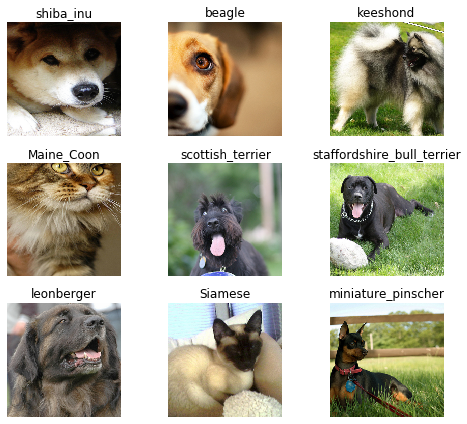

In [0]:
data.show_batch(rows=3,figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.5MB/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

classification problem with error rate

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.877499,0.493243,0.142760,01:54
1,0.676933,0.391375,0.104871,01:53
2,0.508858,0.279552,0.080514,01:54
3,0.339388,0.275373,0.079838,01:54


In [0]:
learn.save('stage-1')

In [0]:
! ls -la

total 16
drwxr-xr-x 1 root root 4096 Oct 25 16:58 .
drwxr-xr-x 1 root root 4096 Nov  2 16:57 ..
drwxr-xr-x 1 root root 4096 Oct 30 15:14 .config
drwxr-xr-x 1 root root 4096 Oct 25 16:58 sample_data


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

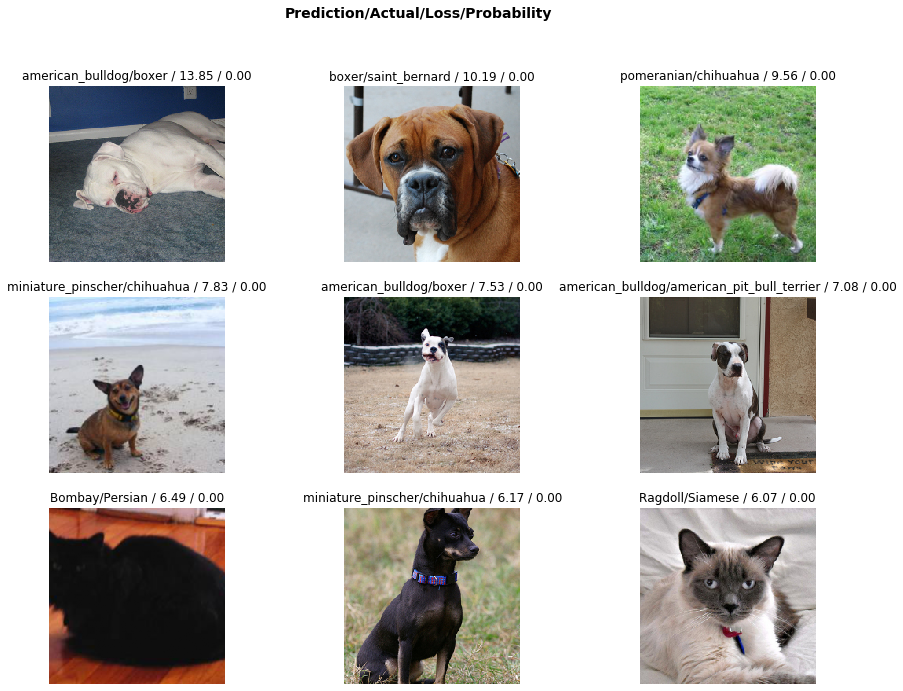

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

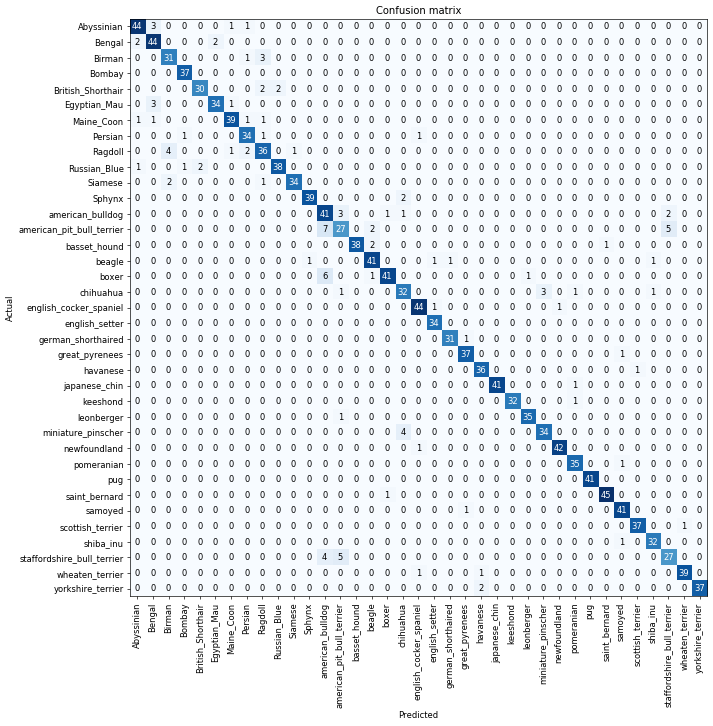

In [0]:
interp.plot_confusion_matrix(figsize=(12,12) , dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'american_bulldog', 7),
 ('boxer', 'american_bulldog', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'beagle', 2),
 ('basset_hound', 'beagle', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.915651,0.449364,0.133965,02:00


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


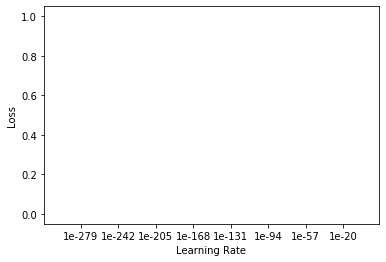

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.469751,0.292693,0.091340,02:00


the min lr which has to be specified should be absoultuley lowest path in the graph .
Max lr should be the local min point before curve starts to shoot up.

Don't make assumptions . 